In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

import seaborn as sns

warnings.filterwarnings("ignore")

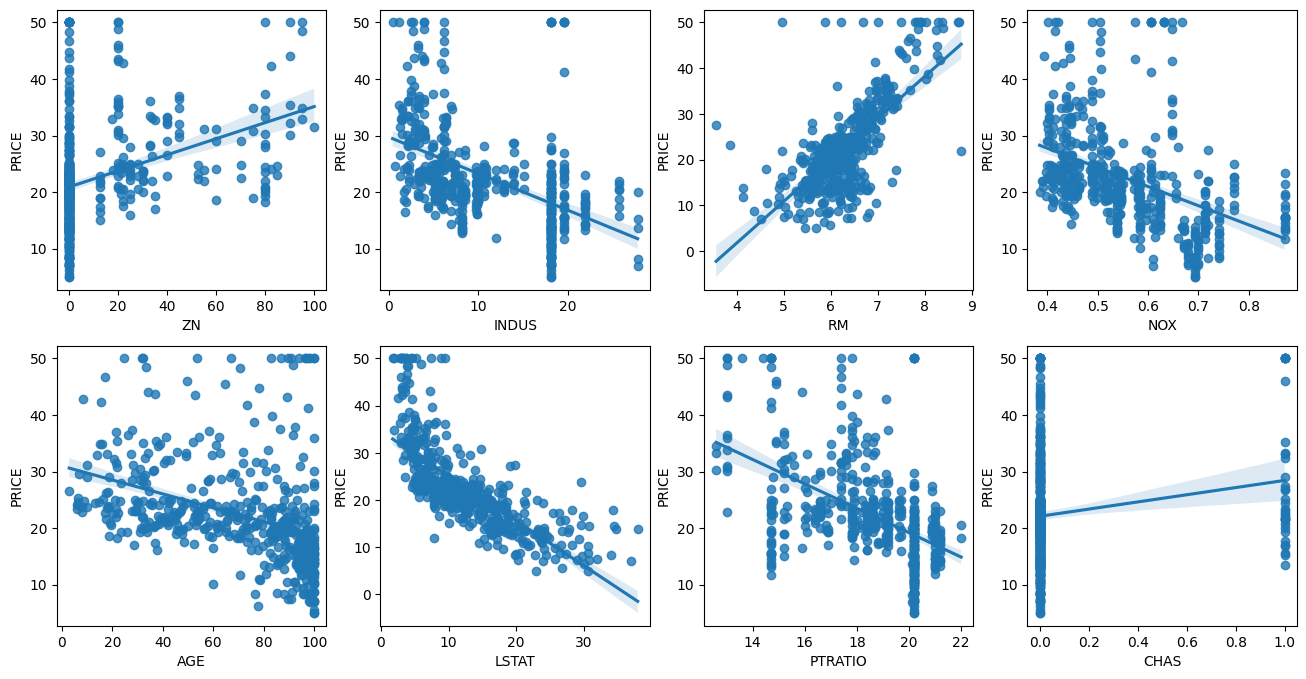

In [5]:
# from sklearn.datasets import fetch_openml

# boston = fetch_openml(name='boston')

from sklearn.datasets import load_boston

boston = load_boston()

boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

# print(boston_df)
boston_df["PRICE"] = boston.target

ig, axs = plt.subplots(2, 4, figsize=(16,8))

lm_features = ["ZN", "INDUS", "RM", "NOX", "AGE", "LSTAT", "PTRATIO", "CHAS"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

    sns.regplot(x = feature, y = "PRICE", data = boston_df, ax = axs[row, col])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = boston_df.iloc[ : , :-1]
y_target = boston_df.iloc[ : , -1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse : .3f}, RMSE : {rmse: .3f}")
print(f"Variance score: {r2: .3f}")

MSE :  17.297, RMSE :  4.159
Variance score:  0.757


In [4]:
coef = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coef.loc["intercept"] = np.round(lr.intercept_, 1)
coef.sort_values(ascending = False)

intercept    41.0
RM            3.4
CHAS          3.0
RAD           0.4
ZN            0.1
INDUS         0.0
AGE           0.0
TAX          -0.0
B             0.0
CRIM         -0.1
LSTAT        -0.6
PTRATIO      -0.9
DIS          -1.7
NOX         -19.8
dtype: float64

In [10]:
RM = 6.421
CHAS = 0.0
RAD = 2.0
ZN = 0.0
CRIM = 0.02731
LSTAT = 9.14
PTRATIO = 17.8
DIS = 4.9671
NOX = 0.469

Price1 = 41.0 + RM*3.4 + CHAS*3.0 + RAD*0.4 + ZN*0.1 + CRIM*(-0.1) + LSTAT*(-0.6) + PTRATIO*(-0.9) + DIS*(-1.7) + NOX*(-19.8)
Price2 = 21.6 + RM*3.4 + CHAS*3.0 + RAD*0.4 + ZN*0.1 + CRIM*(-0.1) + LSTAT*(-0.6) + PTRATIO*(-0.9) + DIS*(-1.7) + NOX*(-19.8)

print(Price1)
print(Price2)

24.394399
4.994398999999996


In [11]:
y_pred = lr.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred)

print(f"MSE : {mse : .3f}, RMSE : {rmse: .3f}")
print(f"Variance score: {r2: .3f}")

MSE :  24.430, RMSE :  4.943
Variance score:  0.727
